In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import itertools
import seaborn as sns
sns.set()

In [2]:
p_info = pd.read_csv('participants_data.csv')

In [3]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    data = pd.read_csv('result/' + pid + '_MItask.csv', index_col=0)
    summary = summary.append(data)

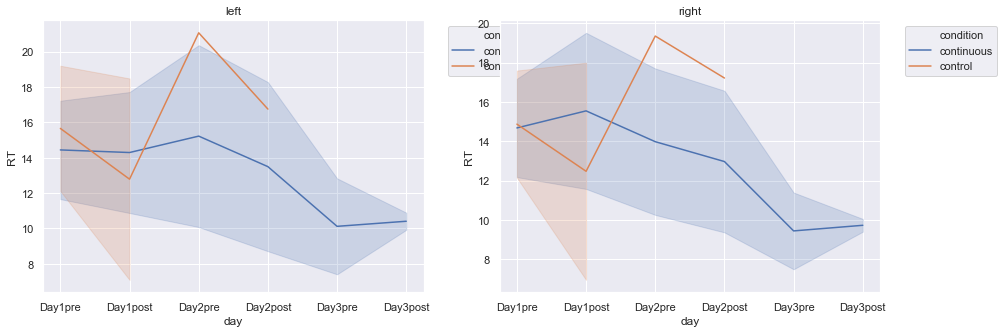

In [4]:
data = summary.groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).mean()
data['day'] = data['day'] + data['timing']
plt.figure(figsize=(15, 5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='day', y='RT', hue='condition', ci='sd', sort=None, data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title(hand)

In [6]:
PTsummary = pd.DataFrame()
for pid in p_info['pid']:
    PT_data = pd.read_csv('result/' + pid + '_PT.csv', index_col=0)
    PTsummary = PTsummary.append(PT_data)

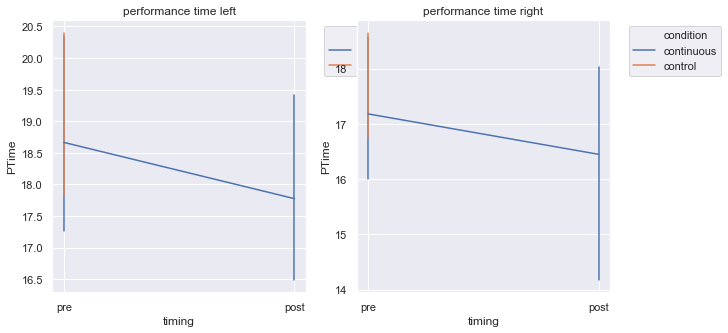

In [7]:
plt.figure(figsize=(10,5))
data = PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='PTime', hue='condition', sort=False, err_style='bars', data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('performance time ' + hand)

In [8]:
PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()

,pid,condition,timing,hand,trial,PTime
0,P01,continuous,pre,right,2,17.011983
1,P01,continuous,pre,left,2,19.758593
2,P01,continuous,post,right,2,18.019494
3,P01,continuous,post,left,2,17.419555
4,P02,continuous,pre,right,2,15.559868
5,P02,continuous,pre,left,2,16.933237
6,P02,continuous,post,right,2,14.175146
7,P02,continuous,post,left,2,16.490160
8,P03,continuous,pre,right,2,15.672179
9,P03,continuous,pre,left,2,16.194748


In [9]:
MC_df = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
MC_df['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']

In [10]:
data = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [11]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [12]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [13]:
MC_df['MC'] = abs(MC_df['RT'] - MC_df['PT'])

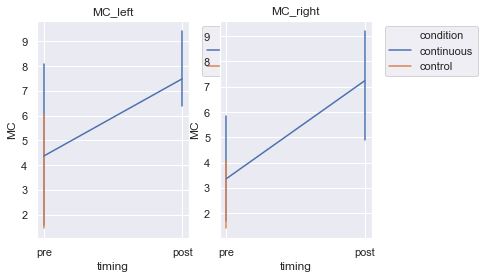

In [14]:
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='MC', hue='condition', sort=False, err_style='bars', data=MC_df[MC_df.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MC_' + hand)